In [384]:
import os
from pprint import pprint
import numpy as np # type: ignore
import pandas as pd # type: ignore
from scipy.io.arff import loadarff # type: ignore
import seaborn as sns # type: ignore
%matplotlib inline
import matplotlib.pyplot as plt # type: ignore

In [385]:
data_test = loadarff(os.path.join("ECG5000", "ECG5000_TEST.arff"))
data_train = loadarff(os.path.join("ECG5000", "ECG5000_TRAIN.arff"))

In [386]:
class_names = ['Normal', 'R on T', 'PVC', 'SP', 'UB']
colors = plt.cm.rainbow

In [387]:
dataset = pd.concat([pd.DataFrame(data_test[0]), pd.DataFrame(data_train[0])])
dataset.shape #видим что в датасете 5000 примеров и 141 признак
dataset.keys()

Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10',
       ...
       'att132', 'att133', 'att134', 'att135', 'att136', 'att137', 'att138',
       'att139', 'att140', 'target'],
      dtype='object', length=141)

In [388]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,0.334577,...,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073,b'1'
1,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,-0.397999,...,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009,b'1'
2,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,-1.440680,...,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767,b'1'
3,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,-1.202146,...,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853,b'1'
4,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,-0.521316,...,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,-1.359872,...,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161,b'4'
496,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,-0.891843,...,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958,b'4'
497,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,-1.690706,...,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028,b'4'
498,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,-0.434310,...,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534,b'5'


In [389]:
dataset["target"].value_counts()

target
b'1'    2919
b'2'    1767
b'4'     194
b'3'      96
b'5'      24
Name: count, dtype: int64

C:\Users\artio\AppData\Local\Temp\ipykernel_11872\1014747810.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


Text(0.5, 0, 'Классы')

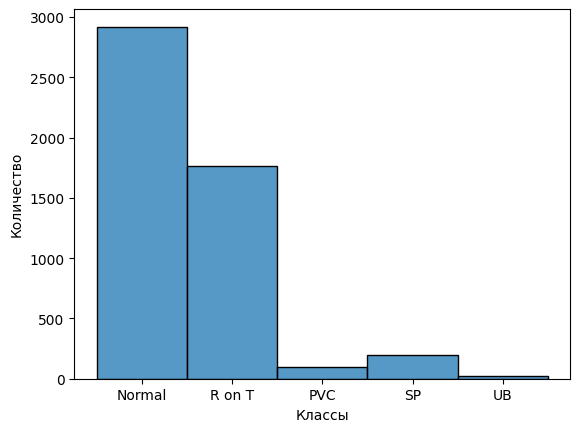

In [390]:
ax = sns.histplot(dataset["target"])
ax.set_xticklabels(class_names)
ax.set_ylabel("Количество")
ax.set_xlabel("Классы")


In [391]:
from numpy import float32
from pandas import DataFrame, Series

df = DataFrame()

df["target"] = dataset["target"]
df["data"] = dataset.iloc[:, 25:110].values.astype(float32).tolist()
df

,target,data
0,b'1',"[0.20091362297534943, 0.10775283724069595, -0...."
1,b'1',"[-0.56536465883255, -0.6614174842834473, -0.60..."
2,b'1',"[-0.8130083084106445, -0.8555601239204407, -0...."
3,b'1',"[-0.5701583623886108, -0.7772442102432251, -0...."
4,b'1',"[-0.6069830656051636, -0.8067130446434021, -0...."
...,...,...
495,b'4',"[-0.12877734005451202, -0.18909484148025513, -..."
496,b'4',"[-0.05170086398720741, -0.020130416378378868, ..."
497,b'4',"[-0.1446286141872406, -0.16848643124103546, -0..."
498,b'5',"[-0.07897409051656723, -0.2221481055021286, -0..."


In [392]:
averaged_df = df.copy()

#среднее значение для каждой строки в диапазоне столбцов от 25 до 80 включительно
averaged_df["data_mean"] = dataset.iloc[:, 25:110].mean(axis=1)

# Исключаем выбросы
mean = averaged_df["data_mean"].mean()
std = averaged_df["data_mean"].std()
threshold = 2  #порог для выбросов

# удаляем строки, в которых усредненное значение находится за пределами определенного порога от среднего значения
averaged_df = averaged_df[(averaged_df["data_mean"] >= mean - threshold * std) & (averaged_df["data_mean"] <= mean + threshold * std)]
df = averaged_df
averaged_df

TypeError: no numeric data to plot

In [ ]:
def add_noise(signal, noise_level=0.05):
    """
    Добавление шума к сигналу.
    
    Args:
        signal (numpy.array): Исходный сигнал временного ряда.
        noise_level (float): Уровень шума для добавления.
        
    Returns:
        numpy.array: Сигнал с добавленным шумом.
    """
    noise = np.random.normal(scale=noise_level, size=len(signal))
    noisy_signal = signal + noise
    return noisy_signal

In [ ]:
# Предполагается, что у вас есть DataFrame с именем df и столбцами 'target' и 'data'

def augment_data_for_class(df, target_class, desired_rows, noise_level=0.05):
    """
    Создает таблицу заданного размера, состоящую из данных определенного класса и зашумленных данных.

    Args:
        df (pandas.DataFrame): DataFrame с двумя столбцами 'target' и 'data'.
        target_class: Значение класса для аугментации.
        desired_rows (int): Желаемое количество строк в результирующей таблице.
        noise_level (float): Уровень шума для добавления к данным.

    Returns:
        pandas.DataFrame: DataFrame, состоящий из данных определенного класса и зашумленных данных.
    """
    # Отфильтровать данные только для указанного класса
    class_data = df[df['target'] == target_class].copy()
    
    # Проверить, что количество строк в class_data достаточно для создания зашумленных данных
    if len(class_data) >= desired_rows:
        # Сгенерировать заданное количество зашумленных данных
        noise_data = [add_noise(class_data.iloc[i]['data'], noise_level) for i in range(desired_rows)]
    else:
        # Если данных недостаточно, создать столько зашумленных данных, сколько есть
        if len(class_data) > 0:
            noise_data = [add_noise(class_data.iloc[i % len(class_data)]['data'], noise_level) for i in range(desired_rows)]
        else:
            raise ValueError("No data available for class {}.".format(target_class))
    
    # Создать DataFrame с зашумленными данными
    noise_df = pd.DataFrame({'target': [target_class] * desired_rows, 'data': noise_data})
    
    # Объединить данные определенного класса с зашумленными данными
    result_df = pd.concat([class_data, noise_df], ignore_index=True)
       
    return result_df

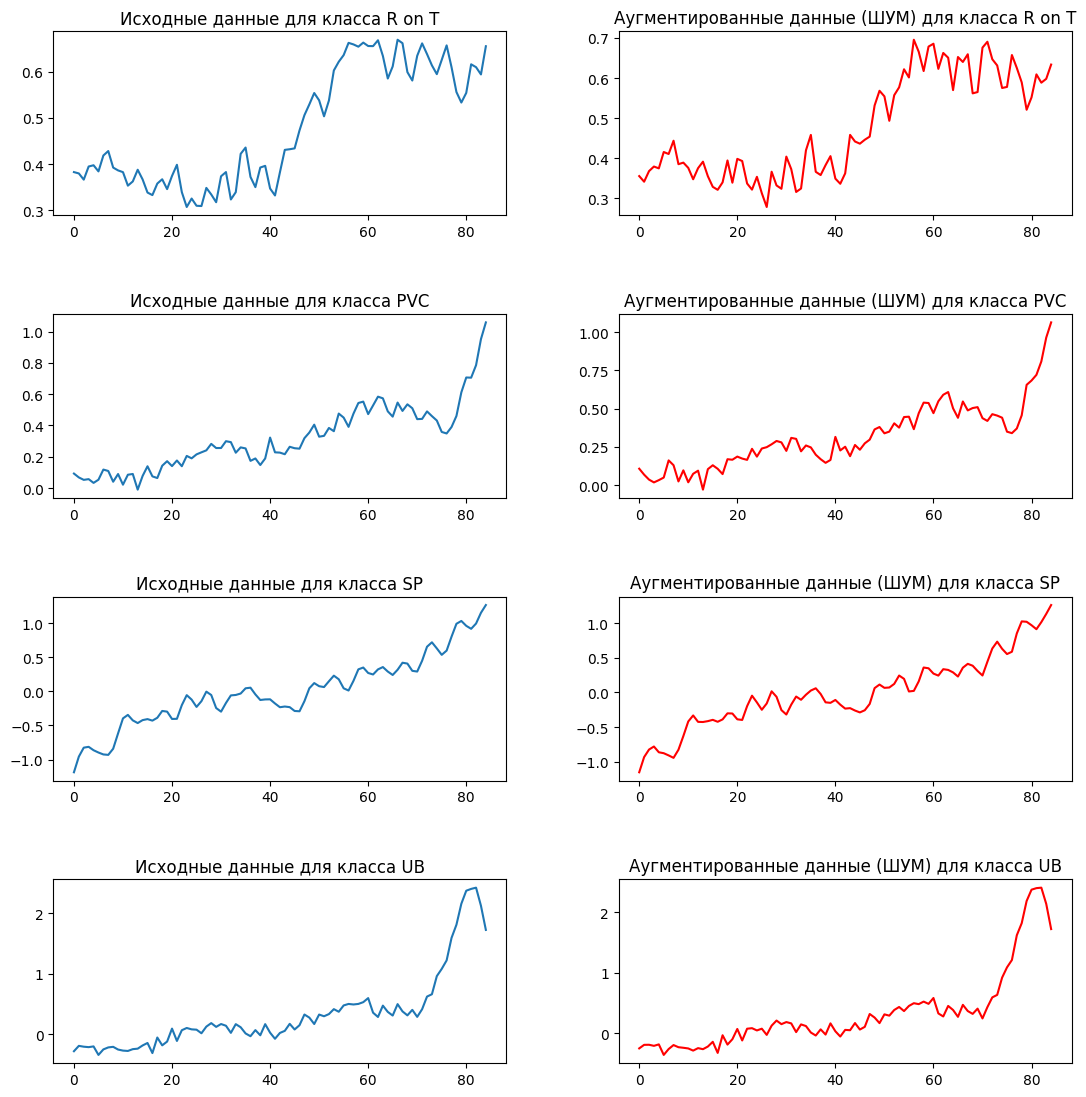

target
b'1'    2875
b'2'    2875
b'3'    2875
b'4'    2875
b'5'    2875
Name: count, dtype: int64

In [ ]:
class_counts = df['target'].value_counts()
normal_class_counts = class_counts.get(b'1', 0)

# Задать уровень шума для добавления
noise_level = 0.02

res = df[df['target'] == b"1"]

fig, axs = plt.subplots(4, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)

for idx, target_class in enumerate(range(2, 6)):
    target_class = str(target_class).encode()
    shift = class_counts.get(target_class, 0)
    desired_rows = abs(normal_class_counts - shift)
    
    augmented_df = augment_data_for_class(df, target_class, desired_rows, noise_level)
    
    res = pd.concat([res, augmented_df], ignore_index=True)
    
    # Определить позицию subplot
    row, col = idx, 0
    axs[row, col].plot(df[df.target == target_class].data.iloc[0])
    axs[row, col].set_title('Исходные данные для класса {}'.format(class_names[int(target_class)-1]))
    
    row, col = idx, 1
    axs[row, col].plot(augmented_df.data.iloc[shift], color='red')
    axs[row, col].set_title('Аугментированные данные (ШУМ) для класса {}'.format(class_names[int(target_class)-1]))

plt.show()

df = res.sort_values(by='target').reset_index(drop=True)
df.target.value_counts()

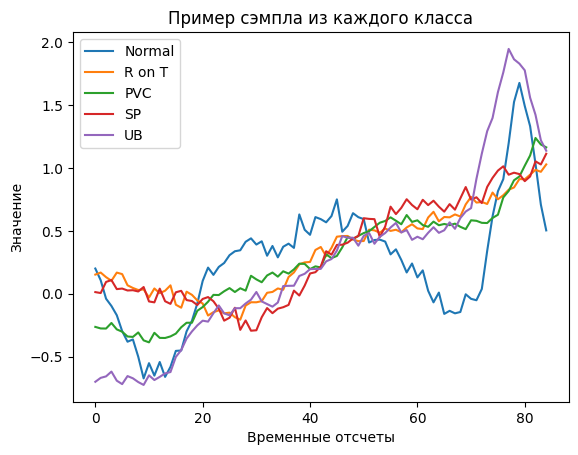

In [ ]:
# Выбор уникальных строк по уникальным значениям в столбце 'столбец_1'
unique_rows = df.drop_duplicates(subset=['target'])

# Настройка заголовка и меток осей
plt.title('Пример сэмпла из каждого класcа')
plt.xlabel('Временные отсчеты')
plt.ylabel('Значение')
for index_, class_ in enumerate(unique_rows.data):
    plt.plot(class_, label=f'{class_names[index_]}')
plt.legend()


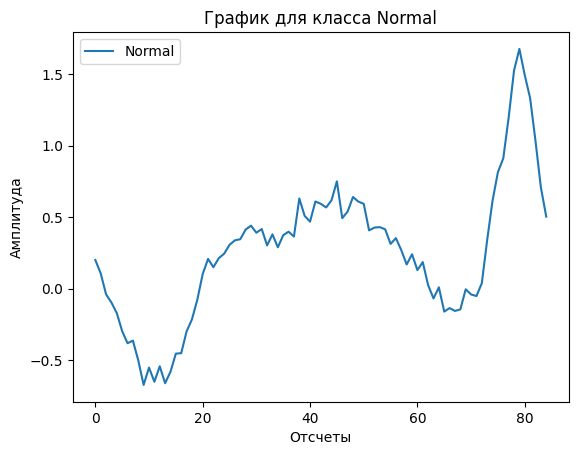

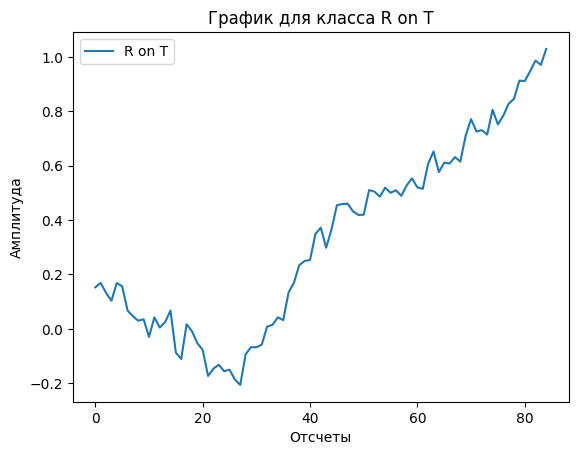

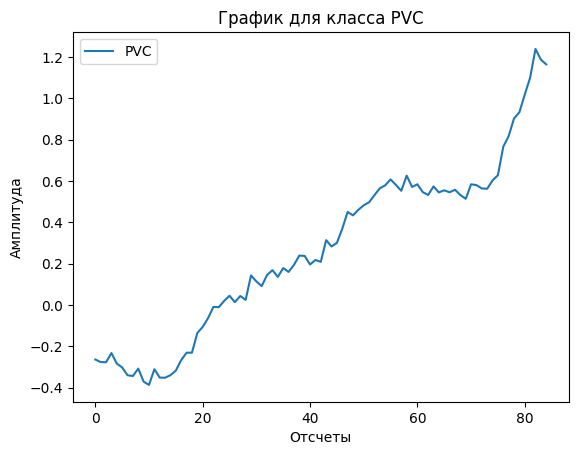

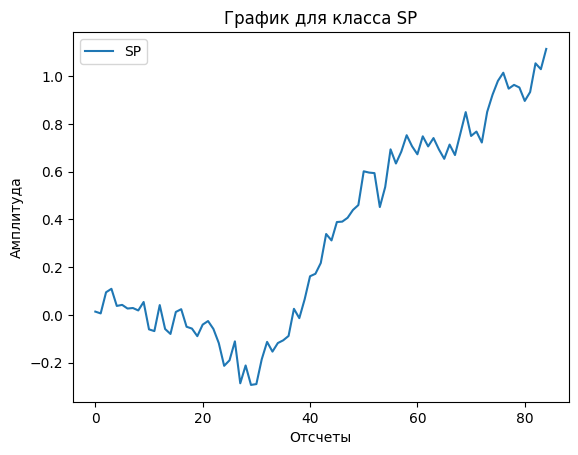

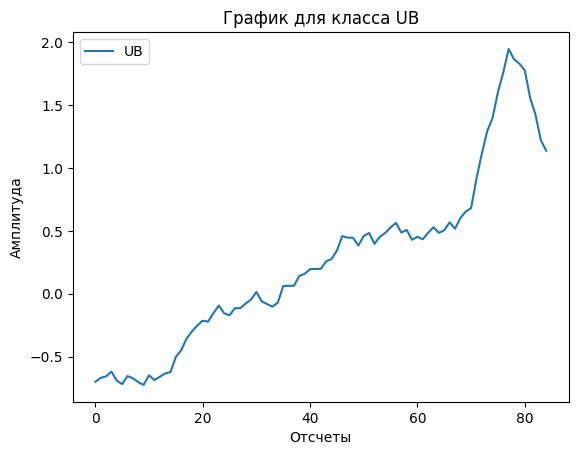

In [ ]:
unique_targets = df['target'].unique().tolist()

for target in unique_targets:
    # Фильтрация данных по текущему классу
    class_data = df[df['target'] == target]
    
    # Выбор уникальных строк для текущего класса по уникальным значениям в столбце 'столбец_1'
    unique_rows = class_data.drop_duplicates(subset=['target'])
    # Построение графика для текущего класса
    plt.figure()
    for index_, sample_ in enumerate(unique_rows.data):
        plt.plot(sample_, label=f"{class_names[int(target)-1]}")
    plt.legend()
    plt.title(f'График для класса {class_names[int(target)-1]}')
    plt.xlabel('Отсчеты')
    plt.ylabel('Амплитуда')
    plt.show()


Нормализация данных ЭКГ с использованием Z-score Normalization с помощью библиотеки scikit-learn в Python


<b>Z-оценка (Z-score)</b> - это один из методов нормализации данных, который приводит значения признаков к стандартному нормальному распределению со средним значением 0 и стандартным отклонением 1. Этот метод полезен, когда данные имеют разные масштабы или когда распределение данных неизвестно.

In [ ]:
dataset = pd.DataFrame(df.data.tolist())
dataset["target"] = df.target

dataset


,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,target
0,0.200914,0.107753,-0.039165,-0.096833,-0.170630,-0.296952,-0.381269,-0.363097,-0.501362,-0.673076,...,0.912150,1.197038,1.525856,1.677409,1.493802,1.332885,1.033417,0.709380,0.504176,b'1'
1,-0.512501,-0.448678,-0.584349,-0.578923,-0.651830,-0.671469,-0.710777,-0.759999,-0.669489,-0.776554,...,1.217435,1.381908,1.508138,1.733503,1.919992,1.787193,1.757425,1.541934,1.350767,b'1'
2,-0.651264,-0.660753,-0.761589,-0.734536,-0.757564,-0.755273,-0.822588,-0.824832,-0.784644,-0.778423,...,1.221723,1.357169,1.500262,1.809092,1.929628,1.871375,1.795005,1.682734,1.502059,b'1'
3,-0.577596,-0.651395,-0.738936,-0.730803,-0.829869,-0.935167,-0.872146,-0.906406,-0.947456,-0.960033,...,1.500896,1.742089,1.942616,1.845761,1.828634,1.615312,1.426890,1.238460,0.880479,b'1'
4,-0.226056,-0.207232,-0.314160,-0.387690,-0.314736,-0.521907,-0.446721,-0.370551,-0.604878,-0.450057,...,1.712594,2.025635,1.853742,1.721134,1.626661,1.436111,1.318480,0.909352,0.699074,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14370,-0.553774,-0.530075,-0.562356,-0.599305,-0.607628,-0.688275,-0.633701,-0.748799,-0.759672,-0.680736,...,0.430364,0.424342,0.485797,0.407023,0.416255,0.520412,0.815554,0.933723,1.206542,b'5'
14371,-0.722212,-0.676935,-0.685539,-0.641372,-0.776571,-0.722220,-0.687570,-0.723259,-0.647748,-0.681432,...,1.231401,1.102119,0.829765,0.456380,0.049731,-0.196421,-0.225518,-0.073387,-0.131882,b'5'
14372,-0.353175,-0.335856,-0.354467,-0.343170,-0.330374,-0.262789,-0.160173,0.067244,0.146552,0.203873,...,-1.004915,-0.948719,-1.084108,-1.082758,-1.114365,-1.070046,-1.143125,-1.228140,-1.178155,b'5'
14373,-0.702960,-0.681873,-0.655835,-0.529655,-0.259665,0.014683,0.287044,0.499751,0.610245,0.645192,...,0.385028,0.440701,0.354482,0.277113,0.258817,0.248189,0.274775,0.338698,0.336509,b'5'


In [ ]:
from sklearn.preprocessing import StandardScaler, normalize, scale

data = dataset.iloc[:, :-1].values.astype(float32)
pprint(f"Средние значения: {data.mean()}")
pprint(f"Стандартное отклонение: {data.std()}")

scaler = StandardScaler()
normalized_features = scaler.fit_transform(data)
normalized_features

'Средние значения: 0.3081260919570923'
'Стандартное отклонение: 0.48520493507385254'


array([[ 0.54634786,  0.35038543,  0.0136764 , ...,  0.47850338,
         0.06693326, -0.13364415],
       [-1.1761104 , -1.0119499 , -1.3094858 , ...,  1.6329995 ,
         1.3461558 ,  1.0855352 ],
       [-1.5111367 , -1.5311826 , -1.7396476 , ...,  1.6929251 ,
         1.5624948 ,  1.3034109 ],
       ...,
       [-0.7914367 , -0.73572254, -0.75156134, ..., -2.9921916 ,
        -2.9100754 , -2.5563765 ],
       [-1.6359506 , -1.5828902 , -1.4829822 , ..., -0.7312202 ,
        -0.50262123, -0.37510216],
       [-1.7144525 , -1.527768  , -1.4394823 , ..., -0.65004504,
        -0.50631225, -0.3411088 ]], dtype=float32)

l2 нормализация используется если выбросы играют важную роль

In [ ]:
normalized_features_l2 = normalize(data, norm="l2")

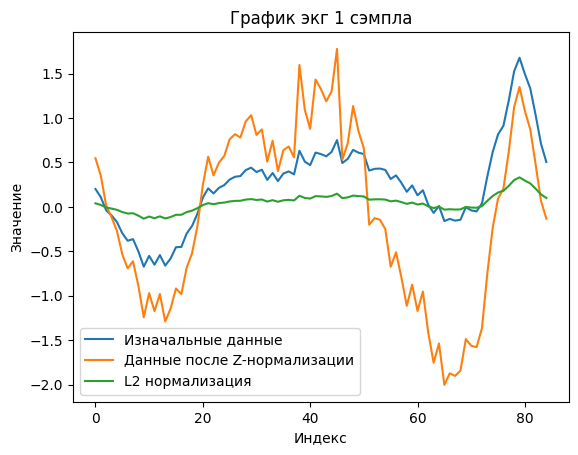

In [ ]:
plt.title('График экг 1 сэмпла')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.plot(data[0], label='Изначальные данные')
plt.plot(normalized_features[0], label='Данные после Z-нормализации')
plt.plot(normalized_features_l2[0], label='L2 нормализация')
plt.legend()

In [ ]:
means = [np.mean(subarray) for subarray in data]
std_devs = [np.std(subarray) for subarray in data]

for i, (mean, std_dev) in enumerate(zip(means, std_devs)):
    print(f"{i+1}: Среднее = {mean}, Стандартное отклонение = {std_dev}")

1: Среднее = 0.252166211605072, Стандартное отклонение = 0.48806431889533997
2: Среднее = 0.23447348177433014, Стандартное отклонение = 0.648651659488678
3: Среднее = 0.2219320386648178, Стандартное отклонение = 0.6802422404289246
4: Среднее = 0.2723621129989624, Стандартное отклонение = 0.6896320581436157
5: Среднее = 0.29790300130844116, Стандартное отклонение = 0.5707326531410217
6: Среднее = 0.40547484159469604, Стандартное отклонение = 0.36693713068962097
7: Среднее = 0.3024693429470062, Стандартное отклонение = 0.6708599925041199
8: Среднее = 0.15316204726696014, Стандартное отклонение = 0.5248815417289734
9: Среднее = 0.1530749797821045, Стандартное отклонение = 0.721746027469635
10: Среднее = 0.1999243050813675, Стандартное отклонение = 0.6625653505325317
11: Среднее = 0.10384535044431686, Стандартное отклонение = 0.3112162947654724
12: Среднее = 0.28188055753707886, Стандартное отклонение = 0.6362711191177368
13: Среднее = 0.22788608074188232, Стандартное отклонение = 0.675295